# 3.1.4 Sensibilidad a la selección de datos

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

## 3.1.4.1 Definición del problema



In [9]:
#
# Función a aproximar
# (Proceso geneador de datos)
#
def f(x):
    return 2 * np.abs(np.sin(x * np.pi / 4 + 0.75)) / (1 + 0.1 * x)


#
# Datos reales.
# (No disponibles en la realidad)
#
x_real = np.linspace(0, 10, 100)
x_real = x_real[:, np.newaxis]
y_real = f(x_real)

In [10]:
#
# Muestra de datos.
# (Información disponible en la realidad)
#
rng = np.random.default_rng(12345)

x_sample = np.linspace(0, 10, 100)
rng.shuffle(x_sample)
x_sample = x_sample[:25]
x_sample = np.sort(x_sample)

y_sample = f(x_sample)
X_sample = x_sample[:, np.newaxis]

En el siguiente fragmento de código, se seleccionan aleatoriamente **20 datos para entrenamiento del modelo**. Los cinco datos restantes serían usados para evaluar la generalización del modelo. En la figura de abajo, se grafica el polinomio estimado para cada conjunto de datos.

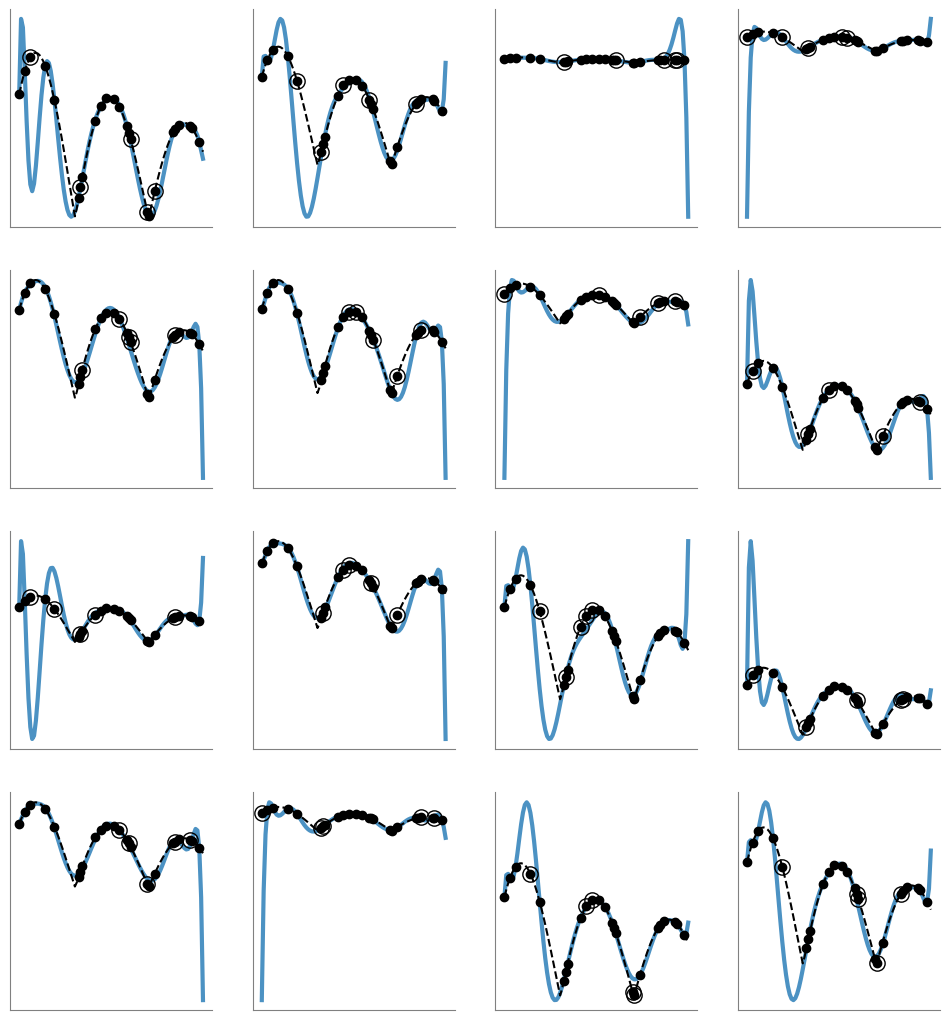

In [11]:
plt.figure(figsize=(12, 13))

optimal_degree = 13

n_samples = len(x_sample)
n_test = 5
n_train = n_samples - n_test

for i_plot in range(16):

    plt.subplot(4, 4, i_plot + 1)

    #
    # Datos
    #
    plt.plot(x_real, y_real, "--", color="black", alpha=1.0, zorder=10)
    plt.plot(x_sample, y_sample, "o", color="black", alpha=1.0, zorder=10)

    #
    # Modelo
    #
    indexes = np.random.choice(
        n_samples,
        n_train,
        replace=False,
    )

    X_sample_train = X_sample[indexes]
    y_sample_train = y_sample[indexes]

    X_sample_test = np.delete(X_sample, indexes)
    y_sample_test = np.delete(y_sample, indexes)

    model = make_pipeline(
        PolynomialFeatures(optimal_degree, include_bias=False),
        MinMaxScaler(),
        LinearRegression(),
    )
    model.fit(X_sample_train, y_sample_train)
    y_predicted = model.predict(x_real)

    plt.plot(x_real, y_predicted, color="tab:blue", linewidth=3, zorder=2, alpha=0.8)

    plt.plot(
        X_sample_test,
        y_sample_test,
        "o",
        color="black",
        fillstyle="none",
        markersize=11,
    )

    plt.xticks([], [])
    plt.yticks([], [])

    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)


plt.show()

Conclusión: El error de la muestra de prueba es una **cantidad aleatoria**!.

In [12]:
print('ok_')

ok_
